# Exploratory Data Analysis of the Sales data for 12 months of 2019 

TASKS:
    
- What was the best month for sales? How much was earned that month? Assess the distribution of the sales in terms of months?    

- What city sold the most product?

- What time should we display advertisemens to maximize the likelihood of customer’s buying product?

- What products are most often sold together?

- What product sold the most? Why do you think it sold the most?

In [3]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

**The csv files are each for a month. I'll merge them in a csv file**

In [4]:
# first I'll check the columns if they are all the same in all the csv files

csv_list = ["Sales_January_2019.csv", "Sales_February_2019.csv", "Sales_March_2019.csv", "Sales_April_2019.csv", 
            "Sales_May_2019.csv", "Sales_June_2019.csv", "Sales_July_2019.csv", "Sales_August_2019.csv",
           "Sales_September_2019.csv", "Sales_October_2019.csv", "Sales_November_2019.csv", "Sales_December_2019.csv"]

for csv in csv_list:
    print(csv.split('_')[1].upper())
    print("----"*3)
    print(pd.read_csv(csv).columns)    
    print("----"*5)

JANUARY
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
--------------------
FEBRUARY
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
--------------------
MARCH
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
--------------------
APRIL
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
--------------------
MAY
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
--------------------
JUNE
------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')
-----------

In [5]:
# Since all the column names are the same, I don't need to rename column names in any of the csv files.
# I can merge them now by using pd.concat

import os

path = "/Users/kadiryildirim/Desktop/DataScience/NOTEBOOKS/EDA_projects/EDA_Sales_Data_Analysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith(('.', 'Sales_data_analysis'))] # '.' to ignore the hidden files and py notebook

df_original = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" +file)
    df_original = pd.concat([df_original, current_data])
    
df_original.to_csv("sales_2019.csv", index=False)

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
# I'll create a deep copy to keep my original csv unchanged.

df = df_original.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


**My user-defined functions to assess the numerical features later**

In [8]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

**Understanding th data and its main features**

In [9]:
df.shape

(186850, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [11]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [12]:
df.size

1121100

In [13]:
df.sample(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10203,305395,Flatscreen TV,1,300,12/19/19 19:03,"692 Hickory St, Los Angeles, CA 90001"
2929,196872,27in FHD Monitor,1,149.99,05/22/19 17:52,"279 11th St, Los Angeles, CA 90001"
6266,200046,27in FHD Monitor,1,149.99,05/16/19 14:49,"303 Washington St, New York City, NY 10001"
3436,165271,Flatscreen TV,1,300,03/12/19 21:45,"244 South St, New York City, NY 10001"
786,279548,27in 4K Gaming Monitor,1,389.99,11/23/19 15:23,"903 Forest St, Seattle, WA 98101"
19491,277946,AAA Batteries (4-pack),1,2.99,10/09/19 08:17,"223 7th St, New York City, NY 10001"
5331,264442,Vareebadd Phone,1,400,10/22/19 16:45,"992 6th St, Austin, TX 73301"
3312,298826,Lightning Charging Cable,1,14.95,12/05/19 18:04,"492 Willow St, Los Angeles, CA 90001"
18068,312928,Bose SoundSport Headphones,1,99.99,12/14/19 17:31,"529 4th St, San Francisco, CA 94016"
2119,211930,27in 4K Gaming Monitor,1,389.99,06/14/19 18:38,"33 10th St, New York City, NY 10001"


In [14]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [15]:
# pip install skimpy

In [16]:
# to change the column names
from skimpy import clean_columns

df = clean_columns(df)

6 column names have been cleaned

In [17]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# CLEANING THE DATA

In [18]:
#duplicated_values check

df.duplicated().value_counts(dropna=False)

False    185688
True       1162
dtype: int64

In [19]:
df[df.duplicated()].sample(10)
# rows of column names 

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
20811,NaN,NaN,NaN,NaN,NaN,NaN
5735,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18194,193916,20in Monitor,1,109.99,04/18/19 12:59,"653 Cherry St, Dallas, TX 75001"
9828,NaN,NaN,NaN,NaN,NaN,NaN
2748,NaN,NaN,NaN,NaN,NaN,NaN
12356,221711,Bose SoundSport Headphones,1,99.99,06/15/19 16:36,"139 West St, New York City, NY 10001"
339,NaN,NaN,NaN,NaN,NaN,NaN
8663,NaN,NaN,NaN,NaN,NaN,NaN
9699,NaN,NaN,NaN,NaN,NaN,NaN
8565,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 1. dropping the NAN rows
df[df.isnull()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
13617,NaN,NaN,NaN,NaN,NaN,NaN
13618,NaN,NaN,NaN,NaN,NaN,NaN
13619,NaN,NaN,NaN,NaN,NaN,NaN
13620,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.dropna(how='all', inplace=True)

In [22]:
df = df.rename(columns = {"price_each": "price", "quantity_ordered": "quantity", "order_date": "date", 
                     "purchase_address":"address"})
df.head()

,order_id,product,quantity,price,date,address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [23]:
date_drop = df[df.date=="Order Date"].index
date_drop

Int64Index([  254,   705,  1101,  2875,  3708,  3793,  3812,  4218,  5143,
             5293,
            ...
             6018,  7727,  8251,  8906,  8918, 10443, 10784, 10813, 11047,
            13304],
           dtype='int64', length=355)

In [24]:
df = df.drop(date_drop)

In [25]:
df[df.date.isnull()]

,order_id,product,quantity,price,date,address


<Figure size 720x360 with 0 Axes>

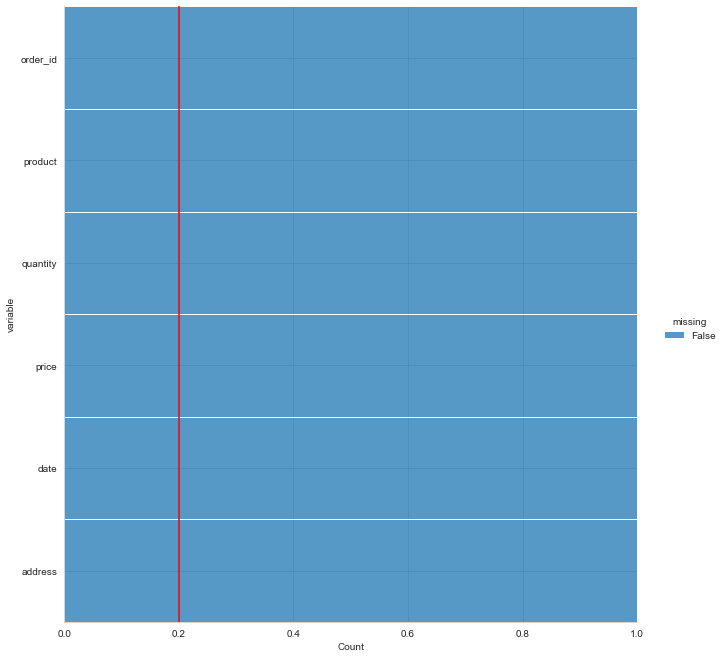

In [26]:
show_nulls(df);

# Setting the dtypes of features

# DATE FEATURE

In [27]:
df.date.str.isalpha().value_counts()

False    182735
Name: date, dtype: int64

In [28]:
df[df.date=="Order Date"]

,order_id,product,quantity,price,date,address


In [29]:
df.date = pd.to_datetime(df.date)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  182735 non-null  object        
 1   product   182735 non-null  object        
 2   quantity  182735 non-null  object        
 3   price     182735 non-null  object        
 4   date      182735 non-null  datetime64[ns]
 5   address   182735 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.8+ MB


In [31]:
df.date.dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
13617    2019
13618    2019
13619    2019
13620    2019
13621    2019
Name: date, Length: 182735, dtype: int64

In [32]:
# for ex: let's see the months ordered in terms of order numbers
df.date.dt.month.value_counts()


12    24680
10    19973
4     17984
11    17282
5     16284
3     14888
7     14032
6     13292
2     11726
8     11719
9     11375
1      9500
Name: date, dtype: int64

# QUANTITY Feature

In [33]:
df.quantity.value_counts()

1    165650
2     13082
3      2870
4       789
5       232
6        80
7        24
8         5
9         3
Name: quantity, dtype: int64

In [34]:
# Since they are all numeric, we can change the dtype of the quantity column to int

df.quantity = df.quantity.astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  182735 non-null  object        
 1   product   182735 non-null  object        
 2   quantity  182735 non-null  int64         
 3   price     182735 non-null  object        
 4   date      182735 non-null  datetime64[ns]
 5   address   182735 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.8+ MB


# PRICE Feature

In [36]:
df.price.value_counts(dropna=False)

11.95     21523
14.95     21308
2.99      20293
3.84      20214
11.99     18552
150       15174
99.99     13109
149.99     7386
700        6687
389.99     6122
379.99     6058
600        5398
300        4685
1700       4619
999.99     4052
109.99     4032
400        2011
600.0      1324
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: price, dtype: int64

In [37]:
df.price

0          1700
1         600.0
2         11.95
3        149.99
4         11.95
          ...  
13617      2.99
13618    149.99
13619     11.95
13620     11.95
13621      2.99
Name: price, Length: 182735, dtype: object

In [38]:
# We can change its type to numeric
pd.options.display.float_format = '{:.2f}'.format
df.price = df.price.astype(float)
df.price.value_counts(dropna=False)

11.95      21523
14.95      21308
2.99       20293
3.84       20214
11.99      18552
150.00     15273
99.99      13109
149.99      7386
700.00      6725
600.00      6722
389.99      6122
379.99      6058
300.00      4705
1700.00     4641
999.99      4052
109.99      4032
400.00      2020
Name: price, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   order_id  182735 non-null  object        
 1   product   182735 non-null  object        
 2   quantity  182735 non-null  int64         
 3   price     182735 non-null  float64       
 4   date      182735 non-null  datetime64[ns]
 5   address   182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [40]:
df.isnull().sum()

order_id    0
product     0
quantity    0
price       0
date        0
address     0
dtype: int64

In [41]:
# I'll check if there are any strange values other than missing values in the object dtype features

print(colored('Descriptive Statistics of Categorical Features:\n', 'blue', attrs=['bold']))

df.describe(include="object").T

Descriptive Statistics of Categorical Features:



,count,unique,top,freq
order_id,182735,175449,160873,5
product,182735,19,USB-C Charging Cable,21523
address,182735,138946,"193 Forest St, San Francisco, CA 94016",9


In [42]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['order_id', 'product', 'address'], dtype='object')

In [43]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

order_id
----------------
160873    5
263918    4
289117    4
277875    4
235798    4
         ..
169524    1
169525    1
169526    1
169527    1
222909    1
Name: order_id, Length: 175449, dtype: int64
----------------------------------------
product
----------------
USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: product, dtype: int64
-------------------

**So there aren't any strange values in the categorical features. Other features have been already converted to numerical types. Now I'll check the price feature as the main numerical feature to get some initial statistical insights**

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,182735.00,1.12,0.44,1.00,1.00,1.00,1.00,9.00
price,182735.00,184.32,332.68,2.99,11.95,14.95,150.00,1700.00


In [45]:
print(colored('Descriptive Statistics of the Price Feature:\n', 'blue', attrs=['bold']))

df.price.describe()

Descriptive Statistics of the Price Feature:



count   182735.00
mean       184.32
std        332.68
min          2.99
25%         11.95
50%         14.95
75%        150.00
max       1700.00
Name: price, dtype: float64

In [46]:
df.head()

,order_id,product,quantity,price,date,address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


# TASK 1: What was the best month for sales? How much was earned that month? Assess the distribution of the sales in terms of months?

In [47]:
# creating a month feature from the date feature

df["month"] = df.date.dt.month

In [48]:
df.month.value_counts()

12    24680
10    19973
4     17984
11    17282
5     16284
3     14888
7     14032
6     13292
2     11726
8     11719
9     11375
1      9500
Name: month, dtype: int64

In [49]:
df.head(1)

,order_id,product,quantity,price,date,address,month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12


In [50]:
# checking the values of quantity feature
df.quantity.value_counts()


1    165650
2     13082
3      2870
4       789
5       232
6        80
7        24
8         5
9         3
Name: quantity, dtype: int64

In [51]:
df[df.quantity>6]
# the price is not for the entire order, it's for each single product. 
# Thus I'll create a sales feature

,order_id,product,quantity,price,date,address,month
672,296304,AAA Batteries (4-pack),7,2.99,2019-12-23 18:27:00,"567 Highland St, San Francisco, CA 94016",12
4258,299713,AA Batteries (4-pack),7,3.84,2019-12-17 20:56:00,"160 Hickory St, Dallas, TX 75001",12
9471,304696,AAA Batteries (4-pack),7,2.99,2019-12-02 21:21:00,"393 West St, Atlanta, GA 30301",12
628,177160,AAA Batteries (4-pack),7,2.99,2019-04-26 11:37:00,"689 7th St, Dallas, TX 75001",4
1225,151674,AAA Batteries (4-pack),7,2.99,2019-02-08 01:02:00,"273 Main St, Austin, TX 73301",2
7700,169360,AAA Batteries (4-pack),7,2.99,2019-03-10 14:34:00,"724 13th St, Boston, MA 02215",3
482,237138,AAA Batteries (4-pack),7,2.99,2019-08-28 09:31:00,"141 Ridge St, San Francisco, CA 94016",8
1021,237654,AAA Batteries (4-pack),7,2.99,2019-08-12 15:07:00,"266 Ridge St, Dallas, TX 75001",8
1180,237807,AAA Batteries (4-pack),8,2.99,2019-08-13 11:11:00,"89 Church St, Portland, OR 97035",8
2919,239467,AAA Batteries (4-pack),7,2.99,2019-08-20 19:20:00,"427 7th St, Boston, MA 02215",8


In [52]:
df["sales"] = df.price * df.quantity


In [53]:
df.head()

,order_id,product,quantity,price,date,address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95


In [54]:
# grouping the months by sales

total_sales = df.groupby("month")[["sales"]].sum().sort_values("sales", ascending=False)
total_sales

,sales
month,
12,4557905.42
10,3679254.16
4,3336376.42
11,3149785.09
5,3101881.04
3,2755969.40
7,2587444.91
6,2524464.99
8,2191698.31


In [55]:
# average sales for each month
monthly_sales = df.groupby("month")[["sales"]].mean()
monthly_sales

,sales
month,
1,188.05
2,184.05
3,185.11
4,185.52
5,190.49
6,189.92
7,184.40
8,187.02
9,180.25


In [56]:
monthly_sales.reset_index(inplace=True)

In [57]:
total_sales.reset_index(inplace=True)

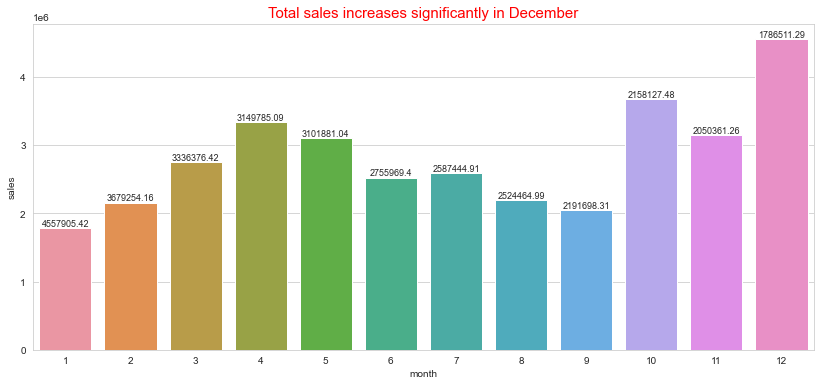

In [58]:

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = total_sales.month, y = total_sales.sales)

plt.title("Total sales increases significantly in December", fontdict = {"fontsize":15, "color": "red"})

ax.bar_label(ax.containers[0], labels = [f'{x}' for x in total_sales.sales], size = 9);


**Result 1:**

December is the best month in terms of total sales. Total amount of sales for this month is $4,557,905.42.

The sales decrease in summer months and also sharply decreases in January. This is highly likely due to the increase during the christmas and noel period.
    

# TASK 2: What city sold the most product?

In [59]:
# to answer this question we have to use some feature engineering on the address column and create a city feature

df.sample(20)

,order_id,product,quantity,price,date,address,month,sales
15102,176440,Bose SoundSport Headphones,1,99.99,2019-03-20 21:21:00,"253 Cherry St, Boston, MA 02215",3,99.99
699,237341,USB-C Charging Cable,1,11.95,2019-08-03 21:02:00,"770 Park St, Los Angeles, CA 90001",8,11.95
17518,276065,AAA Batteries (4-pack),1,2.99,2019-10-23 18:08:00,"816 7th St, San Francisco, CA 94016",10,2.99
7968,303267,27in FHD Monitor,1,149.99,2019-12-15 19:53:00,"591 9th St, Atlanta, GA 30301",12,149.99
18697,313526,27in FHD Monitor,1,149.99,2019-12-07 16:19:00,"541 Chestnut St, San Francisco, CA 94016",12,149.99
5155,155416,USB-C Charging Cable,1,11.95,2019-02-01 18:41:00,"155 Meadow St, San Francisco, CA 94016",2,11.95
18593,313425,AA Batteries (4-pack),1,3.84,2019-12-20 21:55:00,"570 13th St, San Francisco, CA 94016",12,3.84
2703,239258,AAA Batteries (4-pack),2,2.99,2019-08-17 01:49:00,"65 Meadow St, San Francisco, CA 94016",8,5.98
10545,258271,Bose SoundSport Headphones,1,99.99,2019-09-14 18:58:00,"615 Pine St, New York City, NY 10001",9,99.99
439,279218,Flatscreen TV,1,300.00,2019-11-01 19:20:00,"828 Jackson St, Los Angeles, CA 90001",11,300.00


In [60]:
df.address.str.split(",", expand=True).iloc[:,1].value_counts()

 San Francisco    43948
 Los Angeles      29107
 New York City    24456
 Boston           19575
 Atlanta          14616
 Dallas           14571
 Seattle          14487
 Portland         12261
 Austin            9714
Name: 1, dtype: int64

In [61]:
df["city"] = df.address.str.split(",", expand=True).iloc[:,1]

In [62]:
df.head()

,order_id,product,quantity,price,date,address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [63]:
city_sales = df.groupby("city")[["sales"]].sum().sort_values("sales", ascending=False)

In [64]:
city_sales

,sales
city,
San Francisco,8124120.94
Los Angeles,5354039.93
New York City,4581658.91
Boston,3604080.86
Atlanta,2741642.05
Dallas,2717793.72
Seattle,2693048.60
Portland,2276649.24
Austin,1786745.52


In [65]:
city_sales.reset_index(inplace=True)

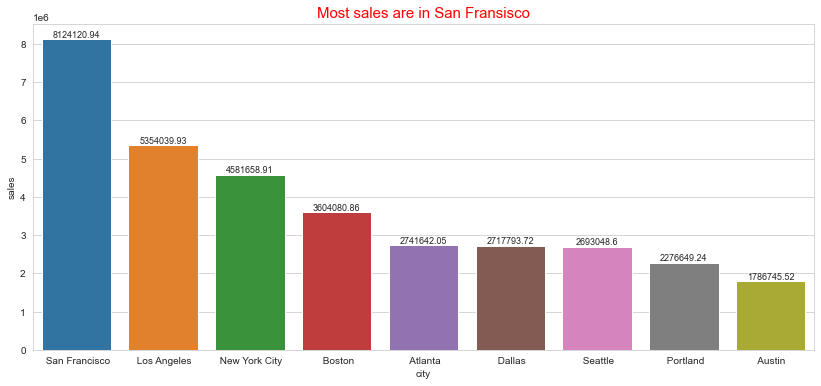

In [66]:

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = city_sales.city, y = city_sales.sales)

plt.title("Most sales are in San Fransisco", fontdict = {"fontsize":15, "color": "red"})

ax.bar_label(ax.containers[0], labels = [f'{x}' for x in city_sales.sales], size = 9);

In [67]:
df.head()

,order_id,product,quantity,price,date,address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


**Result 2:**

San Franscisco is the city with the most sales.

# TASK 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [68]:
# I'll create a feature for the daily hours from the date feature
df["hour"] = df.date.dt.hour

In [69]:
df.head()

,order_id,product,quantity,price,date,address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [70]:
hourly_transactions =  df.hour.value_counts()

In [71]:
hourly_transactions = df.hour.value_counts().reset_index().sort_values("index")

In [72]:
hourly_transactions = hourly_transactions.reset_index()

In [73]:
hourly_transactions.drop("level_0", axis=1,inplace=True)

In [74]:
hourly_transactions.rename(columns={"month" : "hour", "hour":"transaction_numbers"}, inplace=True)

In [75]:
hourly_transactions

,index,transaction_numbers
0,0,3844
1,1,2313
2,2,1227
3,3,816
4,4,843
5,5,1293
6,6,2445
7,7,3945
8,8,6184
9,9,8583


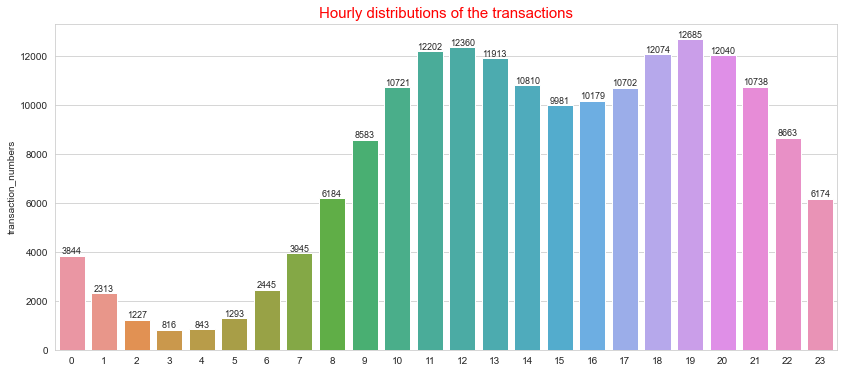

In [76]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = hourly_transactions.index, y = hourly_transactions.transaction_numbers)

plt.title("Hourly distributions of the transactions", fontdict = {"fontsize":15, "color": "red"})

ax.bar_label(ax.containers[0], size = 9);

In [77]:
hourly_sales = df.groupby("hour")[["sales"]].sum().reset_index()
hourly_sales

,hour,sales
0,0,698694.76
1,1,447663.86
2,2,234191.08
3,3,142976.54
4,4,161350.57
5,5,224313.72
6,6,441523.14
7,7,734595.75
8,8,1181363.76
9,9,1612498.90


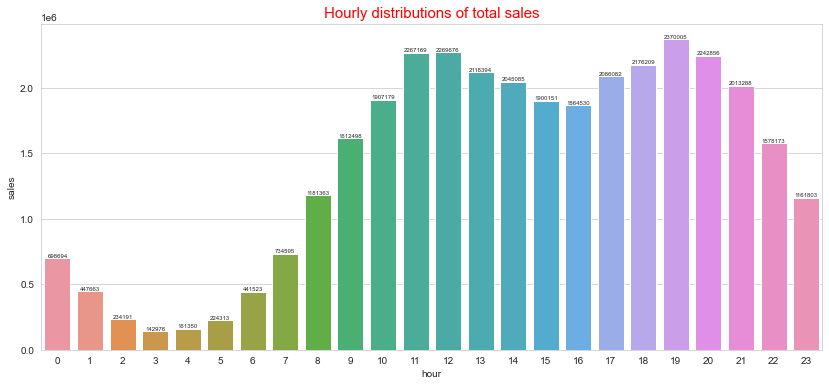

In [78]:

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = hourly_sales.hour, y = hourly_sales.sales)

plt.title("Hourly distributions of total sales", fontdict = {"fontsize":15, "color": "red"})

ax.bar_label(ax.containers[0], fmt='%.0d', size = 6);

**Assessment**

As it can be seen from the graph, the number of transactions decreases at night and increases afterwith 10 am. In this regard, the transaction number increases significantly in the period from 11.00 to 13.00 and from 18.00 to 20.00. Hourly distribution of total sales also show this pattern. So it's better to make advertisements just before these periods and during these periods.

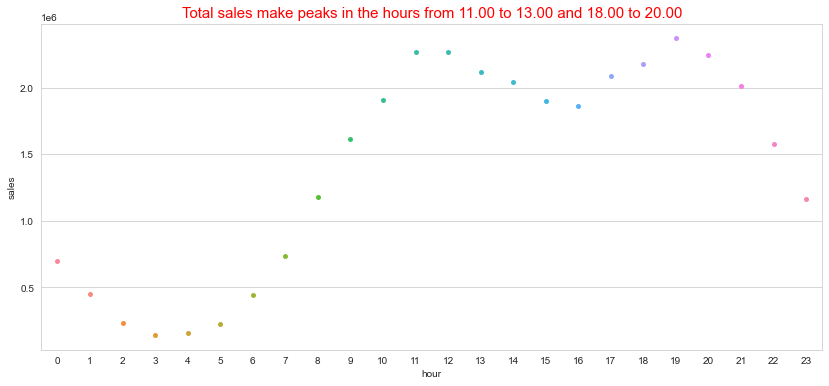

In [79]:

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.swarmplot(x = hourly_sales.hour, y = hourly_sales.sales)

plt.title("Total sales make peaks in the hours from 11.00 to 13.00 and 18.00 to 20.00",
          fontdict = {"fontsize":15, "color": "red"});

# What products are most often sold together?

In [80]:
df.drop_duplicates(keep="first", inplace=True)

In [81]:
df["product"].value_counts()

USB-C Charging Cable          21480
Lightning Charging Cable      21261
AAA Batteries (4-pack)        20265
AA Batteries (4-pack)         20195
Wired Headphones              18519
Apple Airpods Headphones      15250
Bose SoundSport Headphones    13082
27in FHD Monitor               7377
iPhone                         6723
27in 4K Gaming Monitor         6117
34in Ultrawide Monitor         6051
Google Phone                   5430
Flatscreen TV                  4699
Macbook Pro Laptop             4639
ThinkPad Laptop                4050
20in Monitor                   4029
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: product, dtype: int64

In [82]:
df.loc[df.order_id.value_counts(ascending = False)].head(20)

,order_id,product,quantity,price,date,address,month,sales,city,hour
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
5,150507,Lightning Charging Cable,1,14.95,2019-02-24 18:50:00,"387 12th St, Austin, TX 73301",2,14.95,Austin,18
5,162012,AA Batteries (4-pack),1,3.84,2019-03-20 21:33:00,"187 Ridge St, San Francisco, CA 94016",3,3.84,San Francisco,21
5,236675,Wired Headphones,1,11.99,2019-08-02 23:54:00,"470 Hill St, San Francisco, CA 94016",8,11.99,San Francisco,23
5,194100,iPhone,1,700.00,2019-05-10 19:44:00,"81 Jefferson St, San Francisco, CA 94016",5,700.00,San Francisco,19
5,278802,USB-C Charging Cable,1,11.95,2019-11-14 20:34:00,"154 2nd St, San Francisco, CA 94016",11,11.95,San Francisco,20
5,259363,AAA Batteries (4-pack),1,2.99,2019-10-01 18:55:00,"976 Lake St, New York City, NY 10001",10,2.99,New York City,18
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",1,2.99,San Francisco,20
5,248156,34in Ultrawide Monitor,1,379.99,2019-09-13 14:59:00,"469 12th St, Los Angeles, CA 90001",9,379.99,Los Angeles,14


In [83]:
df.duplicated().value_counts()

False    182476
dtype: int64

In [84]:
from itertools import combinations
from collections import Counter

most_sold = Counter([
    t for _, d in df.groupby('order_id').product
    for t in combinations(d, 2)
]).most_common(10)

most_sold

[(('iPhone', 'Lightning Charging Cable'), 971),
 (('Google Phone', 'USB-C Charging Cable'), 953),
 (('iPhone', 'Wired Headphones'), 437),
 (('Google Phone', 'Wired Headphones'), 400),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 348),
 (('iPhone', 'Apple Airpods Headphones'), 343),
 (('Google Phone', 'Bose SoundSport Headphones'), 219),
 (('USB-C Charging Cable', 'Wired Headphones'), 155),
 (('Vareebadd Phone', 'Wired Headphones'), 141),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [85]:
most_sold_product = []
for i in most_sold:
    most_sold_product.append(i[0])

print(most_sold_product)

[('iPhone', 'Lightning Charging Cable'), ('Google Phone', 'USB-C Charging Cable'), ('iPhone', 'Wired Headphones'), ('Google Phone', 'Wired Headphones'), ('Vareebadd Phone', 'USB-C Charging Cable'), ('iPhone', 'Apple Airpods Headphones'), ('Google Phone', 'Bose SoundSport Headphones'), ('USB-C Charging Cable', 'Wired Headphones'), ('Vareebadd Phone', 'Wired Headphones'), ('Lightning Charging Cable', 'Wired Headphones')]


In [86]:
most_sold_quantity = []
for i in most_sold:
    most_sold_quantity.append(i[1])

print(most_sold_quantity)

[971, 953, 437, 400, 348, 343, 219, 155, 141, 92]


In [87]:
most_sold_df = pd.DataFrame(most_sold, columns = ["product_pairs", "number_of_sales"])

In [88]:
most_sold_df

,product_pairs,number_of_sales
0,"(iPhone, Lightning Charging Cable)",971
1,"(Google Phone, USB-C Charging Cable)",953
2,"(iPhone, Wired Headphones)",437
3,"(Google Phone, Wired Headphones)",400
4,"(Vareebadd Phone, USB-C Charging Cable)",348
5,"(iPhone, Apple Airpods Headphones)",343
6,"(Google Phone, Bose SoundSport Headphones)",219
7,"(USB-C Charging Cable, Wired Headphones)",155
8,"(Vareebadd Phone, Wired Headphones)",141
9,"(Lightning Charging Cable, Wired Headphones)",92


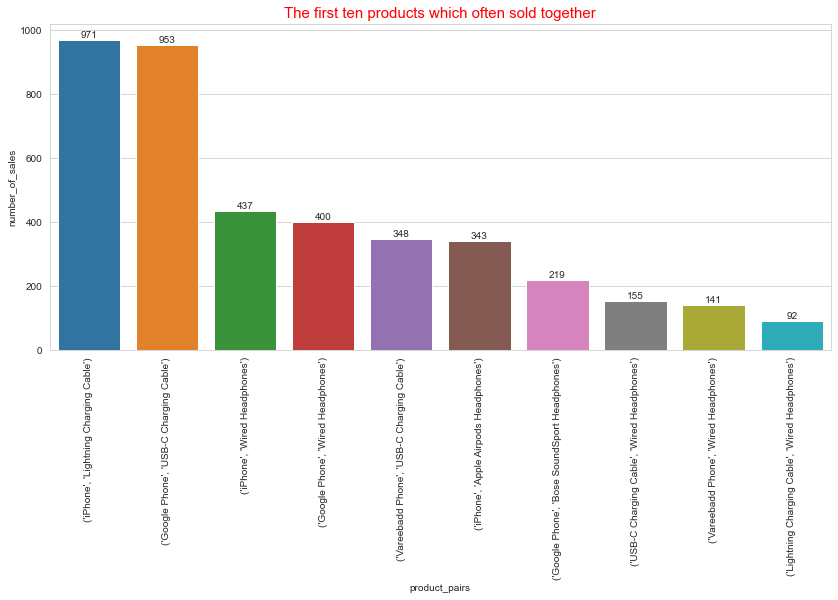

In [89]:

fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = most_sold_df.product_pairs, y = most_sold_df.number_of_sales)

plt.title("The first ten products which often sold together", fontdict = {"fontsize":15, "color": "red"})
plt.xticks(rotation="vertical")

ax.bar_label(ax.containers[0], fmt='%.0d', size = 10);

In [90]:
most_sold_df["percentage"] = most_sold_df.number_of_sales.apply(lambda x: 100 * x /most_sold_df.number_of_sales.sum())

In [91]:
most_sold_df

,product_pairs,number_of_sales,percentage
0,"(iPhone, Lightning Charging Cable)",971,23.92
1,"(Google Phone, USB-C Charging Cable)",953,23.48
2,"(iPhone, Wired Headphones)",437,10.77
3,"(Google Phone, Wired Headphones)",400,9.85
4,"(Vareebadd Phone, USB-C Charging Cable)",348,8.57
5,"(iPhone, Apple Airpods Headphones)",343,8.45
6,"(Google Phone, Bose SoundSport Headphones)",219,5.40
7,"(USB-C Charging Cable, Wired Headphones)",155,3.82
8,"(Vareebadd Phone, Wired Headphones)",141,3.47
9,"(Lightning Charging Cable, Wired Headphones)",92,2.27


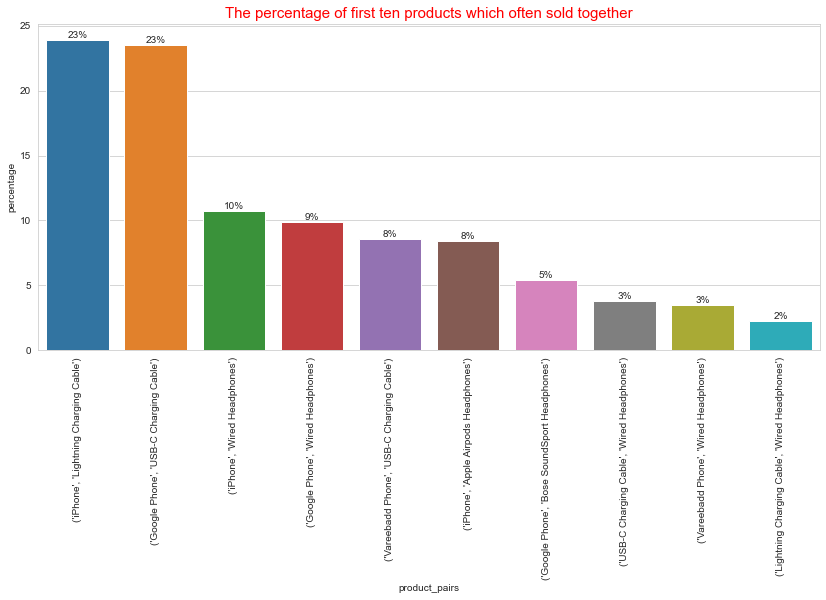

In [92]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = most_sold_df.product_pairs, y = most_sold_df.percentage)

plt.title("The percentage of first ten products which often sold together", fontdict = {"fontsize":15, "color": "red"})
plt.xticks(rotation="vertical")

ax.bar_label(ax.containers[0], fmt='%.0d%%', size = 10);

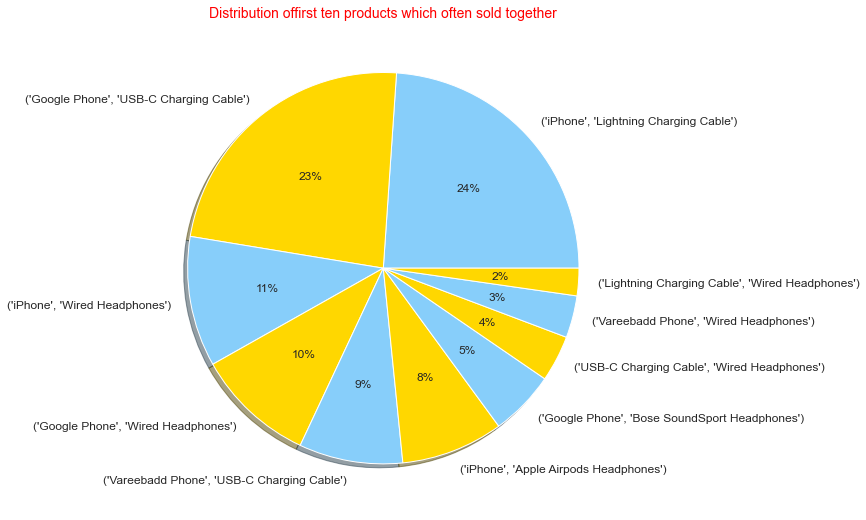

In [93]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.pie(x=most_sold_df.percentage, 
       labels=most_sold_df.product_pairs, 
       autopct='%.0f%%',
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Distribution offirst ten products which often sold together", fontdict = {'fontsize': 14, "color" : "red"})
plt.show()

**Result**

Google phone-USB-C  and iPhone-Lightning charging cable product pairs are the most sold product pairs. These both correspond almost to the half of the total orders.

# TASK 5

What product sold the most? Why do you think it sold the most?

In [94]:
df["product"].value_counts(ascending=False).head(5)

USB-C Charging Cable        21480
Lightning Charging Cable    21261
AAA Batteries (4-pack)      20265
AA Batteries (4-pack)       20195
Wired Headphones            18519
Name: product, dtype: int64

In [95]:
most_product = pd.DataFrame(df.groupby("product")[["price"]].value_counts())

In [96]:
most_product.reset_index(inplace=True)

In [97]:
most_product.rename(columns = {0:"number_of_sales"}, inplace=True)

In [98]:
most_product["percentage"] = most_product.number_of_sales.apply(lambda x: 100 * x /most_product.number_of_sales.sum())

In [99]:
most_product.sort_values("percentage", ascending= False, ignore_index=True, inplace=True)

In [100]:
most_product = most_product.iloc[0:5]

In [101]:
most_product

,product,price,number_of_sales,percentage
0,USB-C Charging Cable,11.95,21480,11.77
1,Lightning Charging Cable,14.95,21261,11.65
2,AAA Batteries (4-pack),2.99,20265,11.11
3,AA Batteries (4-pack),3.84,20195,11.07
4,Wired Headphones,11.99,18519,10.15


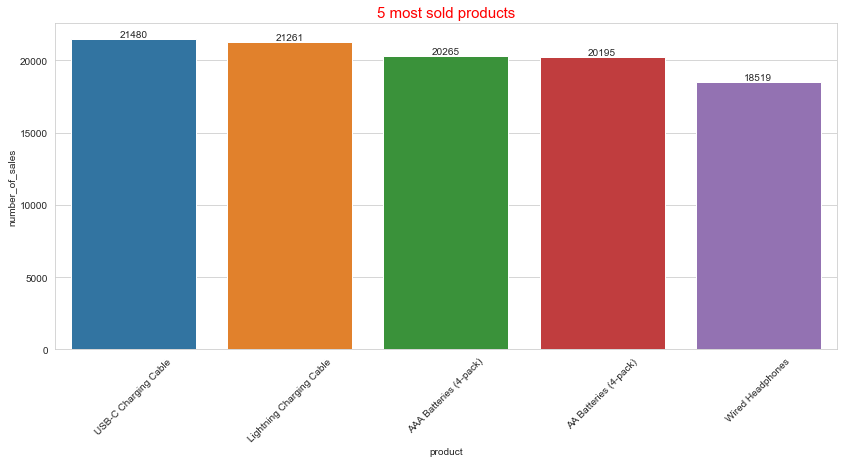

In [102]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = most_product["product"], y = most_product.number_of_sales)

plt.title("5 most sold products", fontdict = {"fontsize":15, "color": "red"})
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], fmt='%.0d', size = 10);

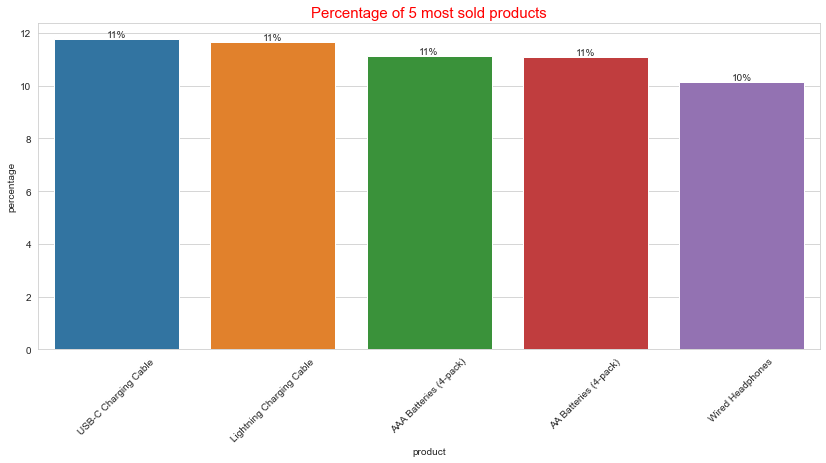

In [103]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(x = most_product["product"], y = most_product.percentage)

plt.title("Percentage of 5 most sold products", fontdict = {"fontsize":15, "color": "red"})
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0], fmt='%.0d%%', size = 10);

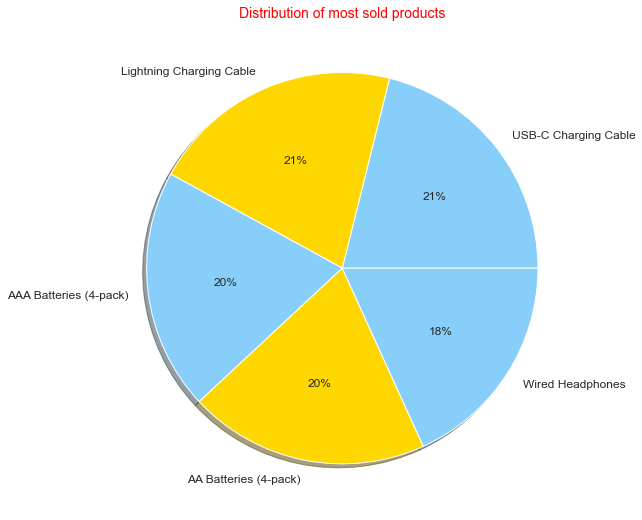

In [104]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.pie(x=most_product["percentage"], 
       labels=most_product["product"], 
       autopct='%.0f%%',
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Distribution of most sold products", fontdict = {'fontsize': 14, "color" : "red"})
plt.show()

**Result**

Most sold products are complementary products such as charging cables, batteries or headphones which can be used almost withh all electronic devices. Whoever buys an electronic device, they also buy these complementary products. 

In [105]:
# Relationship between the product price and total number of sales

In [106]:
df.head()

,order_id,product,quantity,price,date,address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [107]:
df_quantity = df.groupby("product").sum()[["quantity"]]

In [108]:
df_price = df.groupby("product")[["price"]].mean()

In [109]:
df_quantity.reset_index(inplace=True)

In [110]:
df_quantity.columns

Index(['product', 'quantity'], dtype='object')

In [111]:
df_price.reset_index(inplace=True)

In [112]:
df_price.columns

Index(['product', 'price'], dtype='object')

In [113]:
df2 = df_quantity.merge(df_price)

In [114]:
df2.value_counts()

product                     quantity  price  
20in Monitor                4055      109.99     1
LG Dryer                    640       600.00     1
Wired Headphones            20168     11.99      1
Vareebadd Phone             2023      400.00     1
USB-C Charging Cable        23512     11.95      1
ThinkPad Laptop             4052      999.99     1
Macbook Pro Laptop          4643      1700.00    1
Lightning Charging Cable    22794     14.95      1
LG Washing Machine          649       600.00     1
Google Phone                5437      600.00     1
27in 4K Gaming Monitor      6129      389.99     1
Flatscreen TV               4718      300.00     1
Bose SoundSport Headphones  13209     99.99      1
Apple Airpods Headphones    15360     150.00     1
AAA Batteries (4-pack)      30457     2.99       1
AA Batteries (4-pack)       27128     3.84       1
34in Ultrawide Monitor      6069      379.99     1
27in FHD Monitor            7420      149.99     1
iPhone                      6730    

In [115]:
df2.quantity.corr(df2.price)

-0.6012941778704718

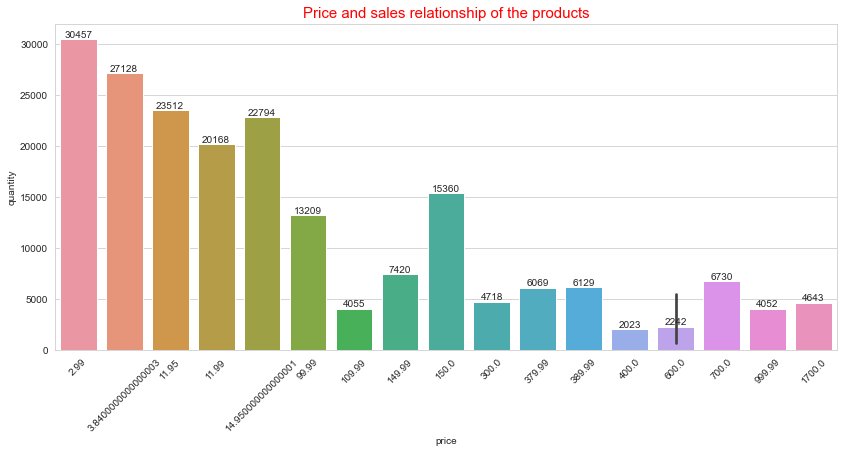

In [116]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.barplot(y = df2.quantity, x=df2.price)
plt.xticks(rotation=45)

plt.title("Price and sales relationship of the products", fontdict = {"fontsize":15, "color": "red"})
ax.bar_label(ax.containers[0], size = 10);



**Result:** 

There is a strong and positive relationship between the prices and the demand.

# Handling with outliers

In [117]:
df_outliers = df.drop(["quantity", "month", "hour"], axis=1) 

In [118]:
df_outliers.head()

,order_id,product,price,date,address,sales,city
0,295665,Macbook Pro Laptop,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,New York City
1,295666,LG Washing Machine,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,New York City
2,295667,USB-C Charging Cable,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,New York City
3,295668,27in FHD Monitor,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,San Francisco
4,295669,USB-C Charging Cable,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta


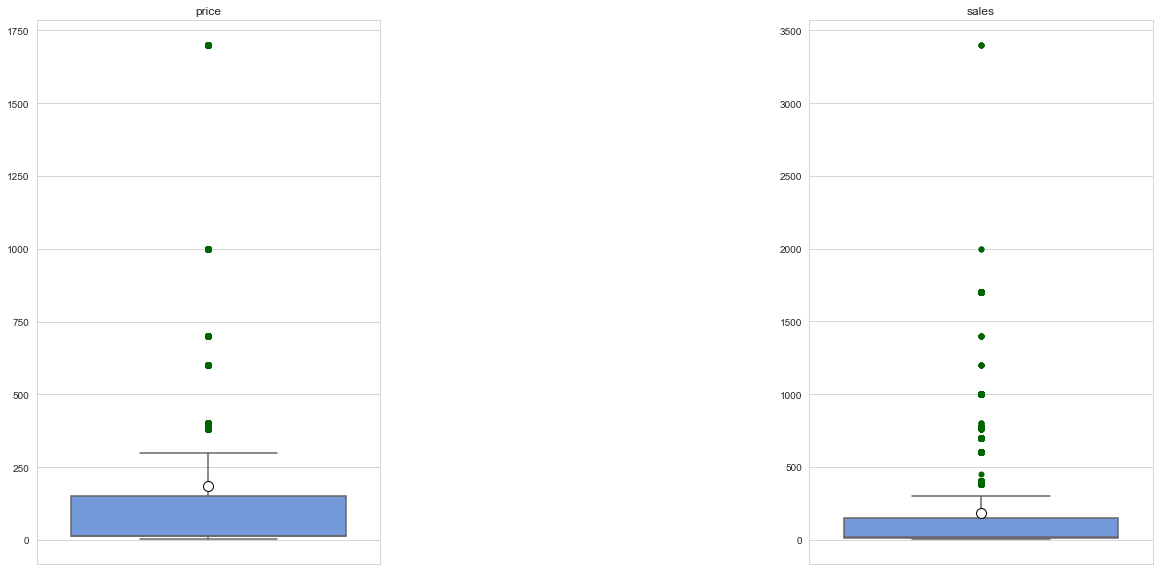

In [119]:
numerical_features_df = df_outliers.select_dtypes('number')
numerical_features_df

inputs = numerical_features_df.columns
num_inputs = len(inputs)

fig, ax = plt.subplots(1, num_inputs, figsize=(20, 10))

for i, (ax, curve) in enumerate(zip(ax.flat, inputs)):
    sns.boxplot(y=numerical_features_df[curve], 
                ax=ax, 
                color='cornflowerblue', 
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white",
                           "markeredgecolor":"black",
                           "markersize":"10"},
                flierprops={'marker':'o',
                            'markerfacecolor':'darkgreen',
                            'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

In [120]:
# statistical features.
df_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
price,182476.00,184.44,332.81,2.99,11.95,14.95,150.00,1700.00
sales,182476.00,185.53,333.01,2.99,11.95,14.95,150.00,3400.00


**Assessment**

Since there are som eexpensive products such as Mecbook Laptop, extreme values can't be defined as outliers and therefore shouldn't be removed from the dataset.

# Preparing the dataset for ML models

In [121]:
df.head()

,order_id,product,quantity,price,date,address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [122]:
df_final = df.drop(["order_id", "date", "address"], axis=1)
df_final.head()

,product,quantity,price,month,sales,city,hour
0,Macbook Pro Laptop,1,1700.00,12,1700.00,New York City,0
1,LG Washing Machine,1,600.00,12,600.00,New York City,7
2,USB-C Charging Cable,1,11.95,12,11.95,New York City,18
3,27in FHD Monitor,1,149.99,12,149.99,San Francisco,15
4,USB-C Charging Cable,1,11.95,12,11.95,Atlanta,12


**1. PRODUCT FEATURE**

In [123]:
df_final["product"].value_counts()

USB-C Charging Cable          21480
Lightning Charging Cable      21261
AAA Batteries (4-pack)        20265
AA Batteries (4-pack)         20195
Wired Headphones              18519
Apple Airpods Headphones      15250
Bose SoundSport Headphones    13082
27in FHD Monitor               7377
iPhone                         6723
27in 4K Gaming Monitor         6117
34in Ultrawide Monitor         6051
Google Phone                   5430
Flatscreen TV                  4699
Macbook Pro Laptop             4639
ThinkPad Laptop                4050
20in Monitor                   4029
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: product, dtype: int64

In [124]:
def mapping_product(x):
    if x in ["USB-C Charging Cable", "Lightning Charging Cable", "AAA Batteries (4-pack)", "AA Batteries (4-pack)", 
            "Wired Headphones", "Apple Airpods Headphones", "Bose SoundSport Headphones", ""]:
        return "supplements"
    elif x in ["27in FHD Monitor", "27in 4K Gaming Monitor", "Flatscreen TV", "Macbook Pro Laptop", "ThinkPad Laptop",
              "20in Monitor"]:
        return "pc_monitor"
    elif x in ["iPhone", "Google Phone", "Vareebadd Phone"]:
        return "phone"
    else:
        return "other"

In [125]:
df_final["product"].apply(mapping_product).value_counts(dropna=False)

supplements    130052
pc_monitor      30911
phone           14173
other            7340
Name: product, dtype: int64

In [126]:
df_final["product_summary"] = df_final["product"].apply(mapping_product)

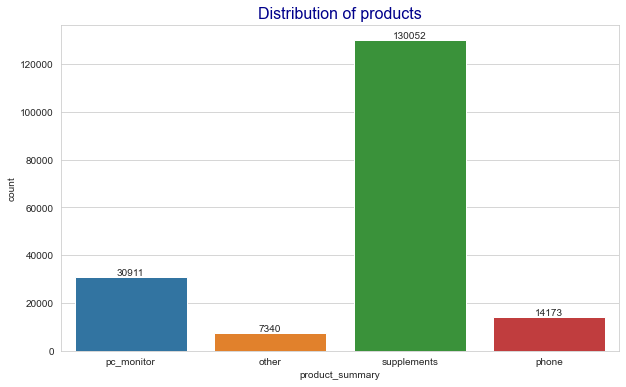

In [127]:
ax = sns.countplot(data=df_final, x="product_summary")

plt.title("Distribution of products", fontsize=16, color="darkblue")

for container in ax.containers:
    ax.bar_label(container);

In [128]:
df_final.drop("product", axis=1, inplace=True)

In [129]:
df_final.head()

,quantity,price,month,sales,city,hour,product_summary
0,1,1700.00,12,1700.00,New York City,0,pc_monitor
1,1,600.00,12,600.00,New York City,7,other
2,1,11.95,12,11.95,New York City,18,supplements
3,1,149.99,12,149.99,San Francisco,15,pc_monitor
4,1,11.95,12,11.95,Atlanta,12,supplements


**Converting categorical features to numerical features**

In [132]:
df_dummy = pd.get_dummies(df_final, drop_first=True)
df_dummy

,quantity,price,month,sales,hour,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle,product_summary_pc_monitor,product_summary_phone,product_summary_supplements
0,1,1700.00,12,1700.00,0,0,0,0,0,1,0,0,0,1,0,0
1,1,600.00,12,600.00,7,0,0,0,0,1,0,0,0,0,0,0
2,1,11.95,12,11.95,18,0,0,0,0,1,0,0,0,0,0,1
3,1,149.99,12,149.99,15,0,0,0,0,0,0,1,0,1,0,0
4,1,11.95,12,11.95,12,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13617,1,2.99,6,2.99,19,0,1,0,0,0,0,0,0,0,0,1
13618,1,149.99,6,149.99,19,0,0,0,0,1,0,0,0,1,0,0
13619,1,11.95,6,11.95,18,0,0,0,0,0,0,1,0,0,0,1
13620,1,11.95,6,11.95,18,0,0,0,0,0,0,1,0,0,0,1


In [133]:
df.shape

(182476, 10)

In [134]:
df_dummy.shape

(182476, 16)

In [135]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
   
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val < 0.3 and val > -0.3:
        color = 'pink'        
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
        
df_dummy.corr().style.applymap(color_correlation).set_precision(2)

,quantity,price,month,sales,hour,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle,product_summary_pc_monitor,product_summary_phone,product_summary_supplements
quantity,1.00,-0.15,0.00,-0.14,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.12,-0.08,0.17
price,-0.15,1.00,-0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.51,0.38,-0.71
month,0.00,-0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,0.00,-0.01,0.00
sales,-0.14,1.00,-0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.51,0.38,-0.71
hour,-0.00,0.00,0.00,0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
city_ Austin,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.08,-0.07,-0.10,-0.09,-0.06,-0.13,-0.07,-0.00,-0.00,0.00
city_ Boston,0.00,-0.00,0.00,-0.00,0.00,-0.08,1.00,-0.10,-0.15,-0.14,-0.09,-0.19,-0.10,-0.00,0.00,0.00
city_ Dallas,0.00,0.00,0.00,0.00,0.00,-0.07,-0.10,1.00,-0.13,-0.12,-0.08,-0.17,-0.09,0.00,0.00,-0.00
city_ Los Angeles,-0.00,-0.00,-0.00,-0.00,0.00,-0.10,-0.15,-0.13,1.00,-0.17,-0.12,-0.24,-0.13,-0.00,-0.00,0.00
city_ New York City,-0.00,0.00,0.00,0.00,-0.00,-0.09,-0.14,-0.12,-0.17,1.00,-0.11,-0.22,-0.12,0.00,-0.00,-0.00


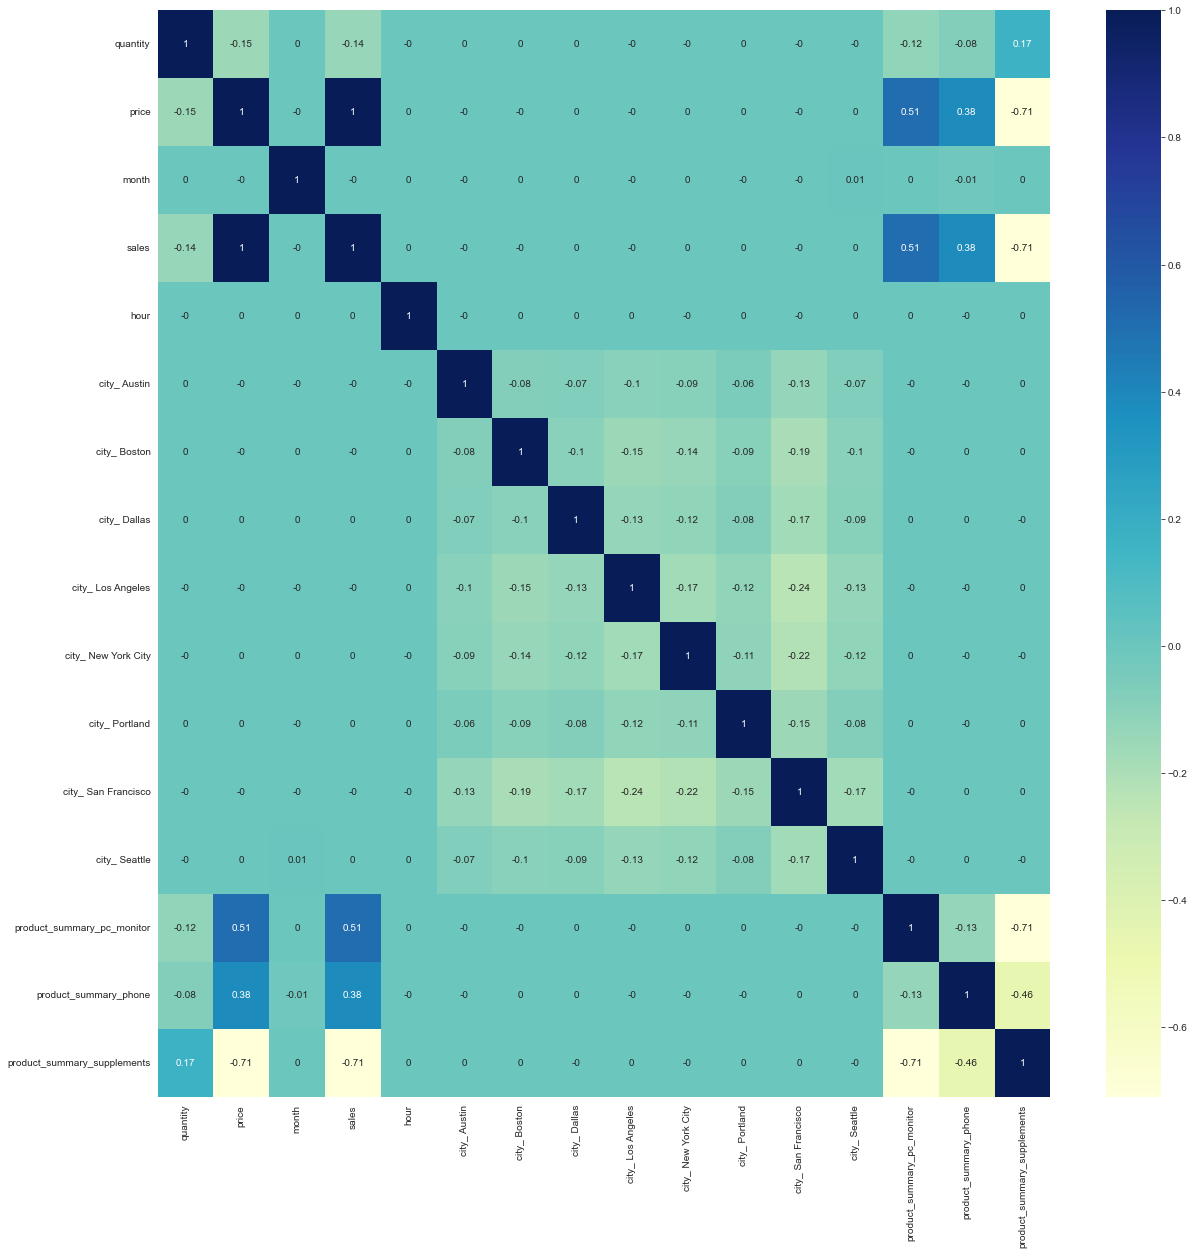

In [136]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_dummy.corr().round(2), annot=True, cmap="YlGnBu");

In [137]:
df_dummy.to_csv("sales_dummy.csv", index = False)

In [138]:
pd.read_csv('sales_dummy.csv')

,quantity,price,month,sales,hour,city_ Austin,city_ Boston,city_ Dallas,city_ Los Angeles,city_ New York City,city_ Portland,city_ San Francisco,city_ Seattle,product_summary_pc_monitor,product_summary_phone,product_summary_supplements
0,1,1700.00,12,1700.00,0,0,0,0,0,1,0,0,0,1,0,0
1,1,600.00,12,600.00,7,0,0,0,0,1,0,0,0,0,0,0
2,1,11.95,12,11.95,18,0,0,0,0,1,0,0,0,0,0,1
3,1,149.99,12,149.99,15,0,0,0,0,0,0,1,0,1,0,0
4,1,11.95,12,11.95,12,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182471,1,2.99,6,2.99,19,0,1,0,0,0,0,0,0,0,0,1
182472,1,149.99,6,149.99,19,0,0,0,0,1,0,0,0,1,0,0
182473,1,11.95,6,11.95,18,0,0,0,0,0,0,1,0,0,0,1
182474,1,11.95,6,11.95,18,0,0,0,0,0,0,1,0,0,0,1


# The end of the Project.